In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### 1. Прогнозирование вычислетельной мощности суперкомпьютеров на 2025 год

50% На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [6]:
# top = pd.read_xml('./data/./data/TOP500_202206_all.xml')
top = pd.read_json('data/top500.json')

In [11]:
top_by_year = top.T.reset_index().rename(columns={'index': 'date'})

In [13]:
top_by_year['#1'].iloc[0]

[59.7, 'GFlop/s']

In [14]:
top_by_year['date'] = pd.to_datetime(top_by_year['date'])
top_by_year['#1'] = top_by_year['#1'].apply(lambda x: x[0])
top_by_year['#500'] = top_by_year['#500'].apply(lambda x: x[0])
top_by_year['Sum'] = top_by_year['Sum'].apply(lambda x: x[0])
top_by_year.head(5)

,date,Sum,#1,#500
0,1993-06-01,1100.0,59.7,0.4
1,1993-11-01,1500.0,124.0,0.5
2,1994-06-01,2300.0,143.4,0.8
3,1994-11-01,2700.0,170.0,1.2
4,1995-06-01,3900.0,170.0,2.0


In [15]:
min_date = top_by_year['date'].min()
top_by_year['days_from_release'] = (top_by_year['date'] - min_date).dt.days

In [16]:
top_by_year.head()

,date,Sum,#1,#500,days_from_release
0,1993-06-01,1100.0,59.7,0.4,0
1,1993-11-01,1500.0,124.0,0.5,153
2,1994-06-01,2300.0,143.4,0.8,365
3,1994-11-01,2700.0,170.0,1.2,518
4,1995-06-01,3900.0,170.0,2.0,730


In [20]:
x = top_by_year['days_from_release'].values
y = top_by_year['#1'].values

In [27]:
year_25_dt = pd.to_datetime('2025')
year_2025_days = (year_25_dt - min_date).days

In [28]:
def get_value(x, coef_):
    y_pred = coef_[0]
    for i in range(1, len(coef_)):
        y_pred += x * coef_[i]
        
    return y_pred

In [37]:
coef_l2 = np.polyfit(x, y, 2)
coef_l1 = np.polyfit(x, y, 1)
coef_exp = np.polyfit(x, np.log(y), 2)

In [38]:
1 + np.linspace(1, 10, 10)

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [40]:
x_linspace

(0, 11537, 500)

In [39]:
x_linspace = (0, year_2025_days, 500)


# pd.to_datetime(x_linspace)

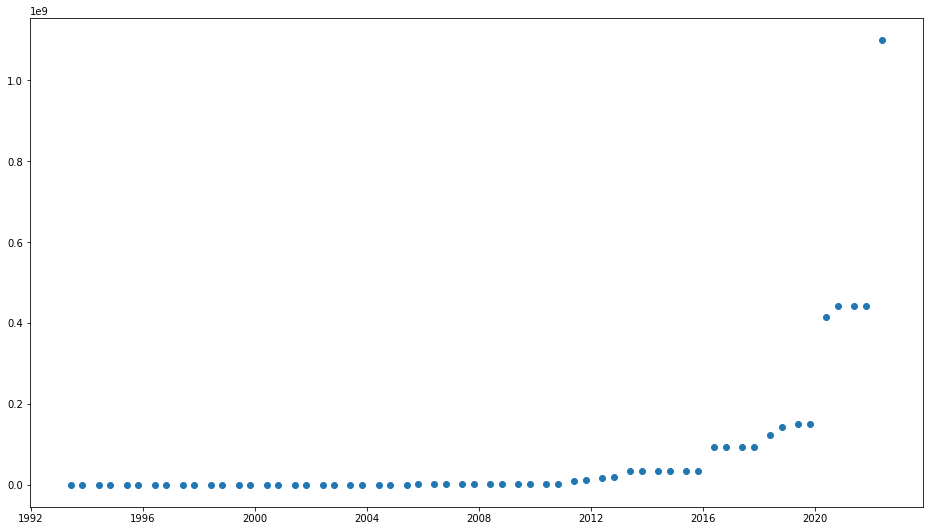

In [35]:
plt.figure(figsize=(16, 9))
plt.scatter(top_by_year['date'], y)

x_linspace = (0, year_2025_days, 500)

y_pred_l2 = get_value(x_linspace, coef_l2)
plt.plot(y_pred_l2
# plt.xlabel('